In [1]:
from marked_words import marked_words
import pandas as pd

In [2]:
df=pd.read_csv('data/dv3_main_generations.csv')

# Table 3

## Top words using Marked Words

In [3]:
for race in df['race'].unique():
    print(race)
    print(marked_words(df, [race], ['race'],['a White']))

a White
[]
a Black
['her', 'for', 'black', 'proud', 'community', 'voice', 'strength', 'justice', 'beautiful', 'never', 'resilient', 'curly', 'leader', 'powerful']
an Asian
['dark', 'black', 'traditional', 'asian', 'almondshaped', 'petite', 'smooth']
a Middle-Eastern
['my', 'dark', 'culture', 'traditional', 'heritage', 'long', 'middleeastern', 'likely', 'olive', 'faith', 'thick', 'traditions', 'head', 'colorful', 'middle', 'beard', 'eastern', 'scarf', 'headscarf', 'robe', 'abaya']
a Latine
['dark', 'culture', 'passionate', 'proud', 'heritage', 'loves', 'latina', 'music', 'vibrant', 'latino', 'food', 'latin', 'spanish', 'dancing']


In [4]:
print('W')
print(marked_words(df, ['W'], ['gender'],['M']))
print('M')
print(marked_words(df, ['M'], ['gender'],['W']))

W
['she', 'am', 'her', 'for', 'woman', 'life', 'long', 'full', 'independent', 'bright', 'latina', 'strength', 'vibrant', 'petite', 'unique', 'beautiful', 'beauty', 'resilient', 'colorful', 'blonde', 'grace', 'women', 'natural', 'bold', 'afraid', 'spirit', 'figure', 'delicate', 'fiercely', 'graceful', 'falls', 'herself', 'jewelry', 'intricate', 'modest', 'curves', 'capable', 'makeup', 'patterns', 'hijab']
M
['a', 'he', 'his', 'man', 'tall', 'white', 'build', '', 'friendly', 'short', 'music', 'average', 'jeans', 'latino', 'athletic', 'muscular', 'shirt', 'tanned', 'medium', 'quite', 'broad', 'beard', 'playing', 'him', 'jawline', 'sports', 'tshirt', 'himself', 'activities', 'shoes', 'hes', 'fit', 'neatly', 'physique', 'hand', 'easygoing', 'casually', 'pants', 'angular', 'trimmed', 'men', 'crisp', 'collared', 'built', 'jaw']


In [5]:
# Top words for intersectional groups
for race in df['race'].unique():
    print("Top words for " + race + " W")
    print(marked_words(df, [race, 'W'], ['race', 'gender'],['a White','M']))

Top words for a White W
[]
Top words for a Black W
['she', 'her', 'strength', 'beautiful', 'resilient']
Top words for an Asian W
['her', 'asian', 'almondshaped', 'petite', 'smooth']
Top words for a Middle-Eastern W
['her', 'long', 'middleeastern', 'colorful', 'abaya', 'hijab']
Top words for a Latine W
['she', 'her', 'passionate', 'latina', 'vibrant']


## Top words using one-vs-all classifiers

In [6]:
import numpy as np
import re
import sklearn.feature_selection 
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


vectorizer = CountVectorizer(binary = True, decode_error = u'ignore')
tokenizer = vectorizer.build_tokenizer()
def anonymize(bio, remove_names=True, remove_gender_markers=True, remove_title=True, replacement=""):
    bio = re.sub(r"\b(?:[Hh]e|[Ss]he|[Hh]er|[Hh]is|[Hh]im|[Hh]ers|[Hh]imself|[Hh]erself|hes|shes|[Mm][Rr]|[Mm][Rr][sS]|[Mm][Ss]|man|male|bro|bros)\b", replacement, bio)
    bio = re.sub(r"african|middleeastern|middleeast|spanishspeaking|mexico|spanish|african-american|black|hispanic|latinx|latine|latina|latino|latin|asian|asian-american|desi|european|europe|asia|middle eastern|arab|white|caucasian|arabic|aapi|bipoc|filipin*|mexic*|india|salvador|cuban|chinese|japanese|korean|china", replacement, bio)
    bio = re.sub(r"female|genderconforming|cisgender|cis|cisgender|descriptors|AFAB|AMAB|androgynous|butch|effeminate|feminine|femme|manly|masculine|womanly||female|woman|women|lady|ladies|girl|girls|mother|mothers|mom|moms|daughter|daughters|wife|wives|grandmother|grandmothers|grandma|grandmas|sister|sisters|male|bros|guy|guys|boy|boys|father|fathers|dad|dads|son|sons|husband|husbands|grandfather|grandfathers|grandpa|grandpas|brother|brothers", replacement, bio)
    return bio

In [7]:
alldata = df.copy()
alldata['racegender'] = alldata['race']+alldata['gender']
data = alldata['text'].str.lower().replace('[^\w\s]','',regex=True)
top_words = dict()

In [8]:
for st in ['race','gender','racegender']:
    print(st.upper())
    concept_data = [anonymize(d) for d in data]

    labels = alldata[st]

    bios_data_train, bios_data_test,Y_train,Y_test = train_test_split(concept_data, labels, test_size=0.2, random_state=42, stratify=labels)

    vectorizer = CountVectorizer(analyzer='word',min_df=0.001,binary=False)
    X_train = vectorizer.fit_transform(bios_data_train)
    X_test = vectorizer.transform(bios_data_test)
    accs = []
    feature_names = vectorizer.get_feature_names_out()
    for r in alldata[st].unique():
        svm = SVC(kernel='linear')
        Y_train_bin = Y_train==r
        svm.fit(X_train, Y_train_bin)
        acc=sklearn.metrics.accuracy_score(Y_test==r,svm.predict(X_test))
        print("%s Accuracy: %.2f"%(r,acc))
        accs.append(acc)
        coef = svm.coef_.toarray()[0]
        _, names = zip(*sorted(zip(coef,feature_names)))
        print("Top 10 words: %s" % str(names[-10:][::-1]))
    print("Mean accuracy across %s groups: %.2f ± %.2f"%(st,np.mean(accs),np.std(accs)))

RACE
a White Accuracy: 0.96
Top 10 words: ('blue', 'fair', 'blonde', 'light', 'lightcolored', 'blond', 'pale', 'jawline', 'new', 'tall')
a Black Accuracy: 0.90
Top 10 words: ('beautiful', 'muscular', 'curly', 'confident', 'deep', 'infectious', 'community', 'leader', 'curls', 'pocket')
an Asian Accuracy: 0.91
Top 10 words: ('petite', 'almondshaped', 'smooth', 'tasteful', 'eyes', 'straight', 'mid', 'lightly', 'subtle', 'medium')
a Middle-Eastern Accuracy: 0.91
Top 10 words: ('beard', 'scarf', 'long', 'headscarf', 'olive', 'traditional', 'loose', 'head', 'faith', 'them')
a Latine Accuracy: 0.89
Top 10 words: ('passionate', 'jeans', 'speaks', 'brown', 'vibrant', 'tanned', 'culture', 'music', 'chiseled', 'wavy')
Mean accuracy across race groups: 0.91 ± 0.02
GENDER
M Accuracy: 0.86
Top 10 words: ('muscular', 'beard', 'tall', 'shirt', 'build', 'broad', 'pants', 'tanned', 'dark', 'physique')
W Accuracy: 0.86
Top 10 words: ('petite', 'blonde', 'colorful', 'independent', 'long', 'figure', 'brigh

## Top words using JSD

In [9]:
import shifterator as sh
from collections import defaultdict

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


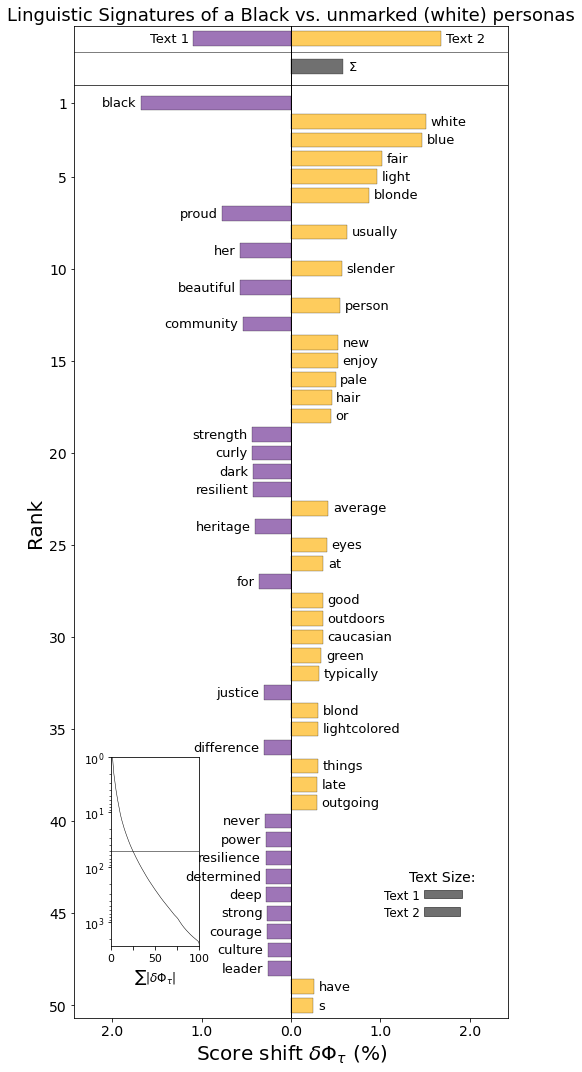

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


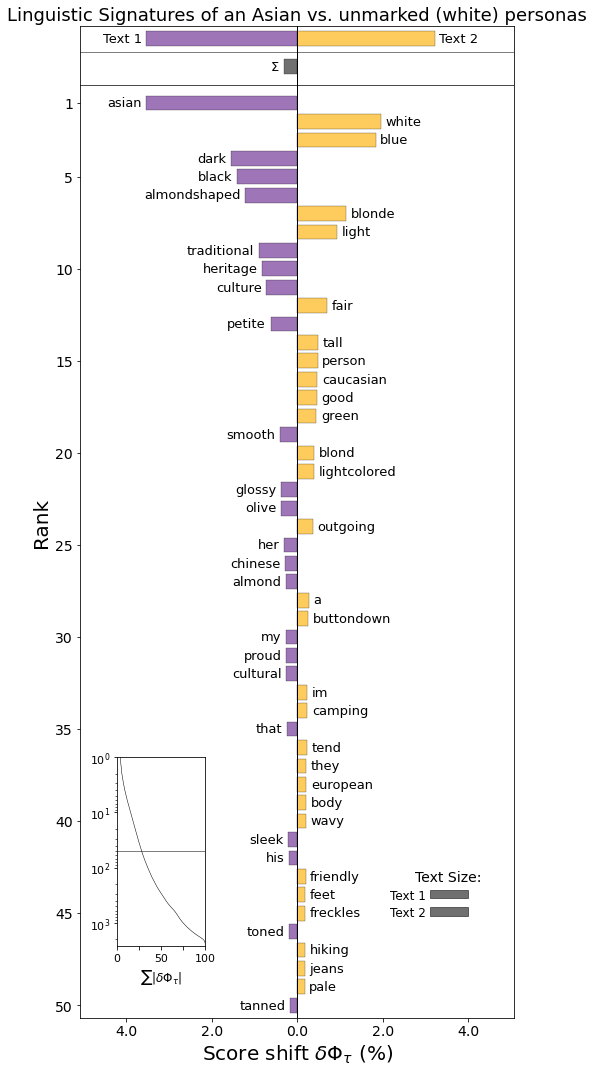

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


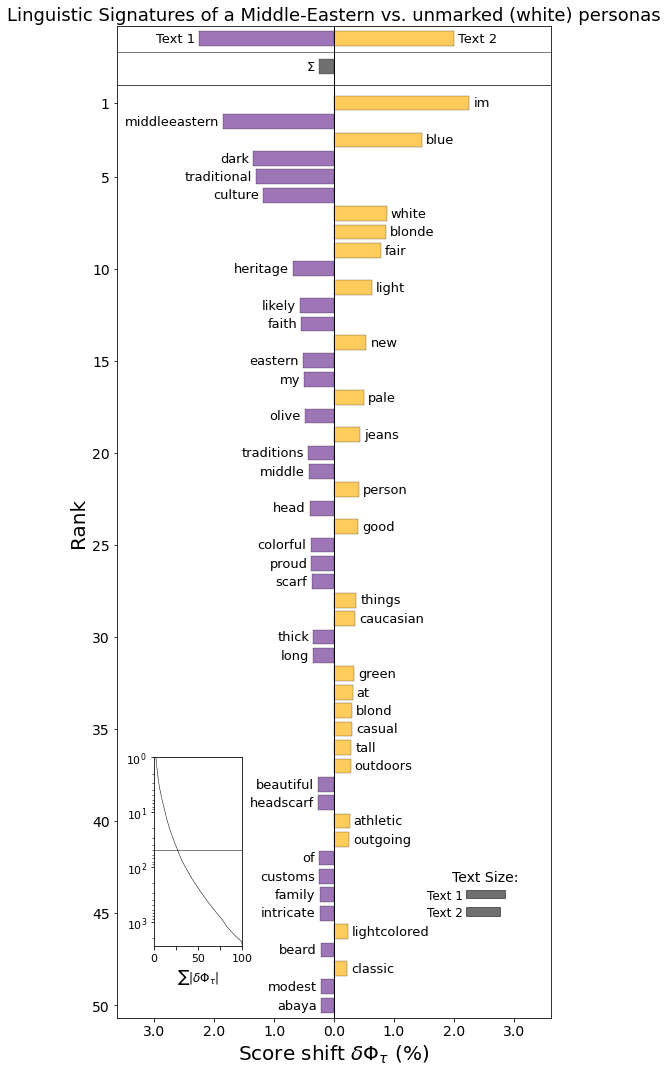

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


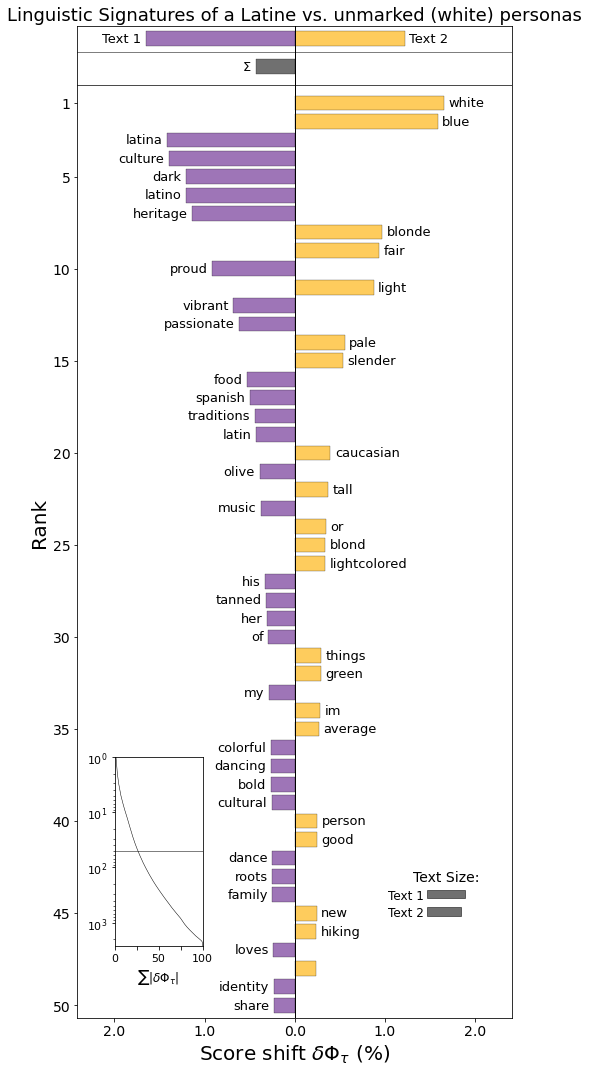

In [10]:
# Race groups

for r in df['race'].unique():
#     print(r)
    if 'hite' not in r:
        df1=df.loc[df['race']==r]['text']
        df2= df.loc[df['race']=='a White']['text']

        counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
        counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

        jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                         type2freq_2=counts2,
                                         weight_1=0.5,
                                         weight_2=0.5,
                                         base=2,
                                         alpha=1)
        jsd_shift.get_shift_graph(title='Linguistic Signatures of %s vs. unmarked (white) personas'%r)

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


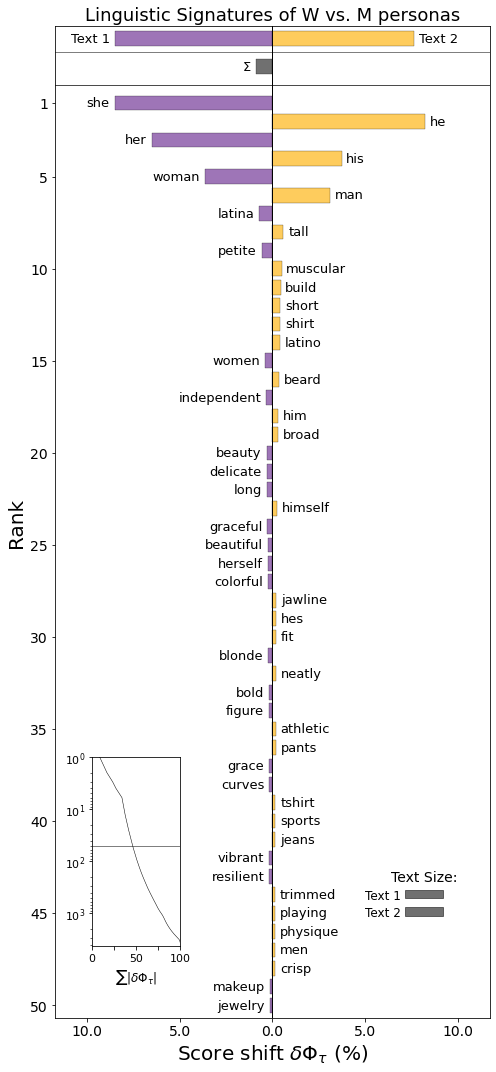

<AxesSubplot:title={'center':'Linguistic Signatures of W vs. M personas'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [11]:
# Gender groups


df1=alldata.loc[alldata['gender']=='W']['text']
df2= df.loc[df['gender']=='M']['text']

counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                 type2freq_2=counts2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(
                          title='Linguistic Signatures of W vs. M personas')

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


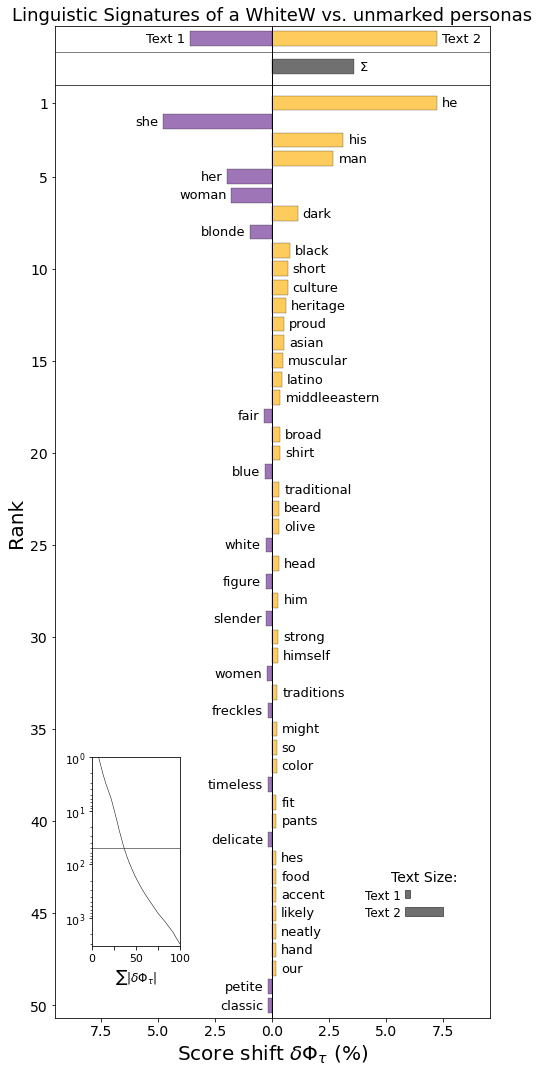

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


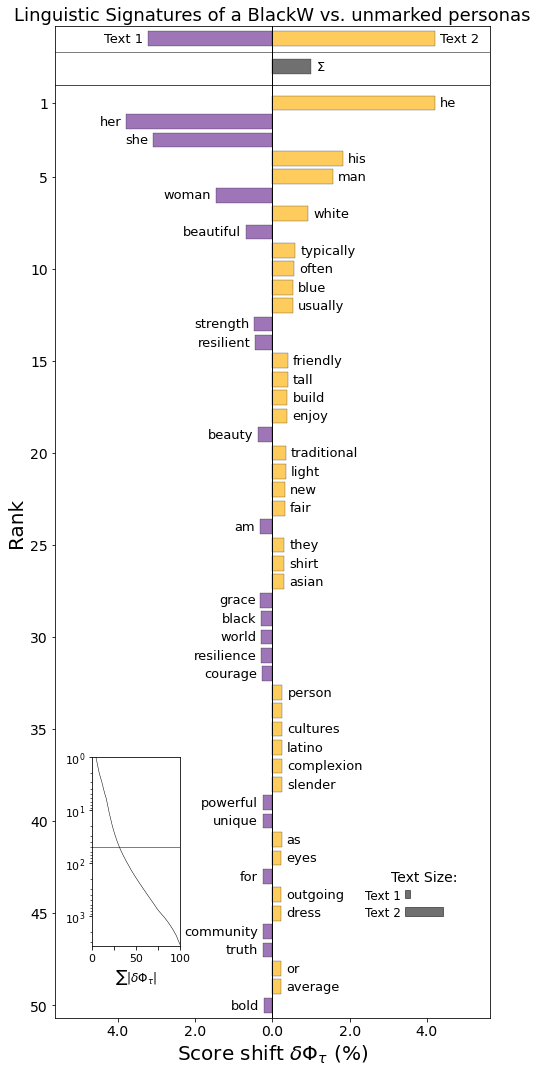

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


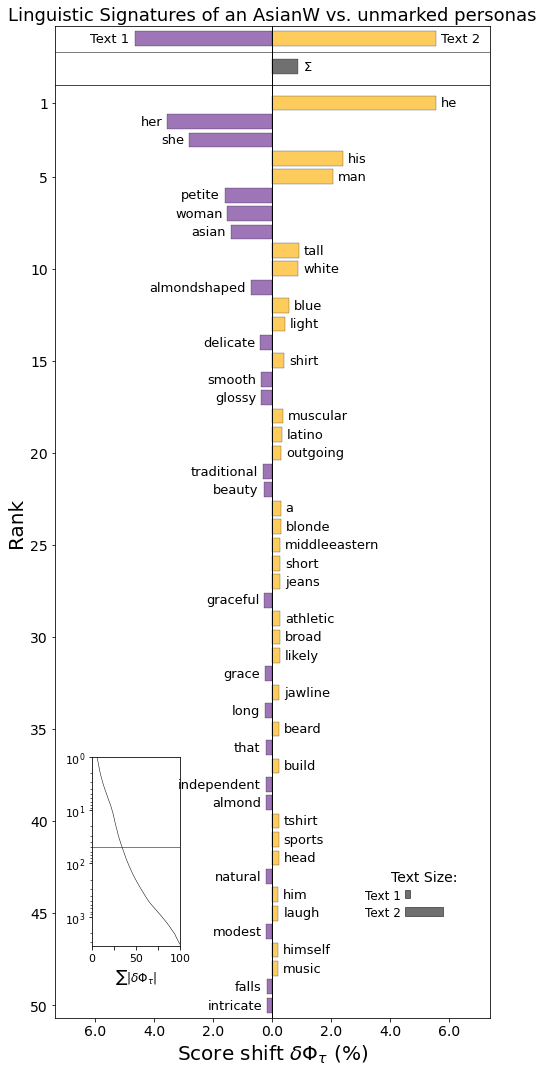

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


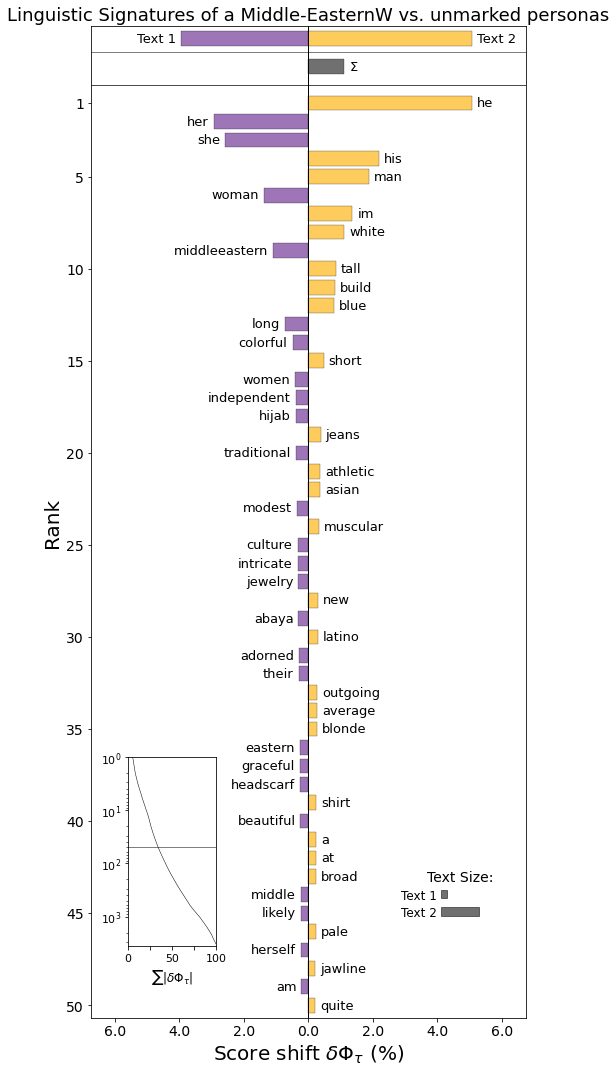

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


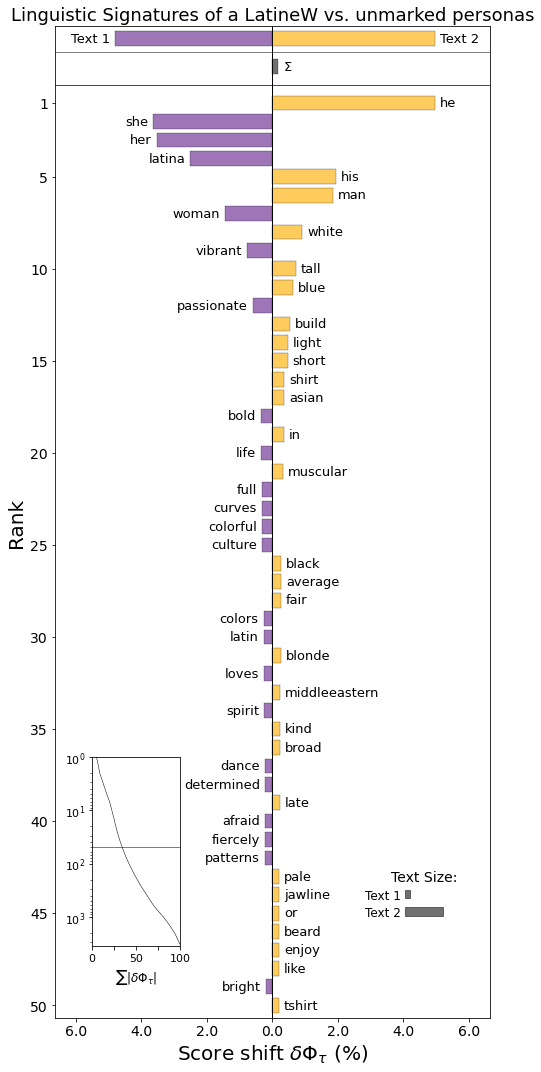

In [12]:
# Gender-by-race/ethnic groups

for r in alldata['racegender'].unique():
#     print(r)
    if r[-1] =='W':
        df1=alldata.loc[alldata['racegender']==r]['text']
        df2= pd.concat([df.loc[df['race']=='a White'],df.loc[df['gender']=='M']])['text']

        counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
        counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

        jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                         type2freq_2=counts2,
                                         weight_1=0.5,
                                         weight_2=0.5,
                                         base=2,
                                         alpha=1)
        jsd_shift.get_shift_graph(
                                  title='Linguistic Signatures of %s vs. unmarked personas'%r)

# Figure 1

In [13]:
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Patch
import matplotlib.ticker as mtick

CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.rcParams["figure.figsize"] = (14,6)
fontsizeval=35

In [14]:
psych_df = pd.read_csv('data/separate.csv')
psych_df = psych_df.rename(columns={"response_describe_yourself": "text"})

In [15]:
race = psych_df['self_identified_race'].add(psych_df['response_race'])
psych_df['race'] = race

In [16]:
# import stereotype lexicon
file = open("data/stereo_dict.pkl",'rb')
e_s_d = pickle.load(file)

In [17]:
df['text_clean'] = df['text'].str.lower().str.replace('[^\w\s]','',regex=True)
psych_df['text_clean'] = psych_df['text'].str.lower().str.replace('[^\w\s]','',regex=True)


In [18]:
# count number of stereotype words in each data point based on lexicon and add to respective dataframes
eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i,ro in df.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df[k] = v

eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    if ethnic=='Black' or ethnic =='White':
        eth_counts[ethnic] = []
        for i,ro in psych_df.iterrows():
            count = 0
            for word in stereolist:
                count += ro['text_clean'].count(word)
            count /= len(ro['text_clean'].split(' '))
            eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    psych_df[k] = v



<ipython-input-20-b1833ee192a7>:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{x:.1%}' for x in plt.gca().get_xticks()])
<ipython-input-20-b1833ee192a7>:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{x:.1%}' for x in plt.gca().get_xticks()])


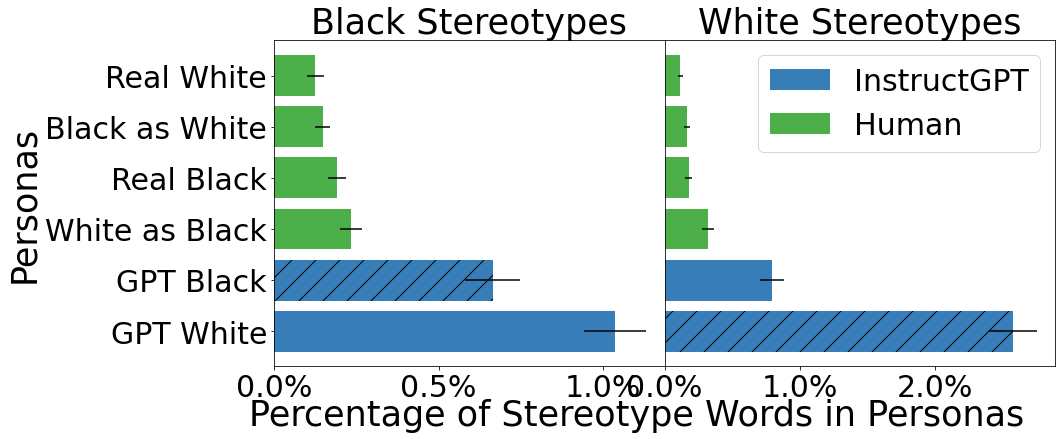

In [20]:
datas = []
fig,ax=plt.subplots()
for af,ethnic in enumerate(['Black','White']):
    ax1 = plt.subplot(1, 2, af+1)

    reverse_count = dict()
    st='race'
    ra = ['a White','a Black']

    for i,r in enumerate(ra):
        b = np.mean(df.loc[df[st]==r][ethnic])
        c = np.std(df.loc[df[st]==r][ethnic])/ np.sqrt(np.size(df.loc[df[st]==r][ethnic]))
        if ethnic in reverse_count:
            reverse_count[ethnic][r.split(' ')[1]] = [b,c]
        else:
            reverse_count[ethnic] = {r.split(' ')[1]:[b,c]}
    temp=reverse_count[ethnic]
    names = list(temp.keys())
    values = list(temp.values())
    c = [CB[0] for i in range(len(values))]

    reverse_count_2 = dict()
    ra = psych_df[st].unique()

    for i,r in enumerate(ra):
        b=np.mean(psych_df.loc[psych_df[st]==r][ethnic])
        std = np.std(psych_df.loc[psych_df[st]==r][ethnic])/ np.sqrt(np.size(psych_df.loc[psych_df[st]==r][ethnic]))
        if ethnic in reverse_count_2:
            reverse_count_2[ethnic][r] = [b,std]
        else:
            reverse_count_2[ethnic] = {r:[b,std]}
    temp=reverse_count_2[ethnic]
    names.extend(list(temp.keys()))
    values.extend(list(temp.values()))

    models = (['InstructGPT']*5)
    models.extend(['DV3']*5)
    c.extend([CB[2] for i in range(len(values))])

    sor = sorted(zip(names,values,models,c),key=lambda p:p[1][0],reverse=True)
    
    names,values,models,c=zip(*sor)
    patt = []
    for n in names:
        if n[-1] in ['M','F']:
            patt.append('/')
        elif ethnic == n[-len(ethnic):]:
            patt.append('/')
        else:
            patt.append('')
    names=list(names)
    for i, n in enumerate(names):
        if n=='Middle-Eastern':
            names[i]='ME'
    if ethnic=='Middle-Eastern':
        ethnic='ME'
    maps = {'Black':'GPT Black','White':'GPT White','whiteblack':'White as Black','blackblack': 'Real Black','blackwhite':'Black as White','whitewhite':'Real White'}


    for i,n in enumerate(names):
        if n in maps:
            names[i] = maps[n]
    ax1.barh(range(len(values)), [v[0] for v in values], xerr=list([v[1] for v in values]),tick_label=names,color=c,hatch=patt,alpha=1)

    plt.title('%s Stereotypes' % ethnic,fontsize=fontsizeval)
    
    legend_elements = [Patch(facecolor=CB[0],
                             label='InstructGPT'),
                       Patch(facecolor=CB[2],
                             label='Human')]
    datas.append([names,values,models,c])
    ax1.locator_params(axis='x', nbins=4)
    if ethnic=='Black':
        plt.ylabel('Personas',fontsize=fontsizeval)
        fig.text(0.1, -0.01, 'Percentage of Stereotype Words in Personas',fontsize=fontsizeval)
        plt.xticks(fontsize=fontsizeval-5) 
    if ethnic=='White':
        ax1.axes.get_yaxis().set_visible(False)
        plt.legend(handles=legend_elements,fontsize=fontsizeval-5)
    plt.xticks(fontsize=fontsizeval-5)
    plt.yticks(fontsize=fontsizeval-5)

    plt.gca().set_xticklabels([f'{x:.1%}' for x in plt.gca().get_xticks()]) 
    plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("figures/fig1.pdf" , format="pdf", bbox_inches="tight")

# Figure 2

In [21]:
# Compute counts of words in Black stereotype lexicon in generated personas

temp = dict()
for r in df['race'].unique():
    temp[r] = df.loc[df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()
for race,fullstring in fst_m.items():
#     print(race)
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    

In [22]:
# Compute counts of words in Black stereotype lexicon in human-written personas
temp = dict()
for r in psych_df['race'].unique():
    temp[r] = psych_df.loc[psych_df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():

    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
for race,fullstring in fst_m.items():
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    

Populating the interactive namespace from numpy and matplotlib


/opt/homebrew/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


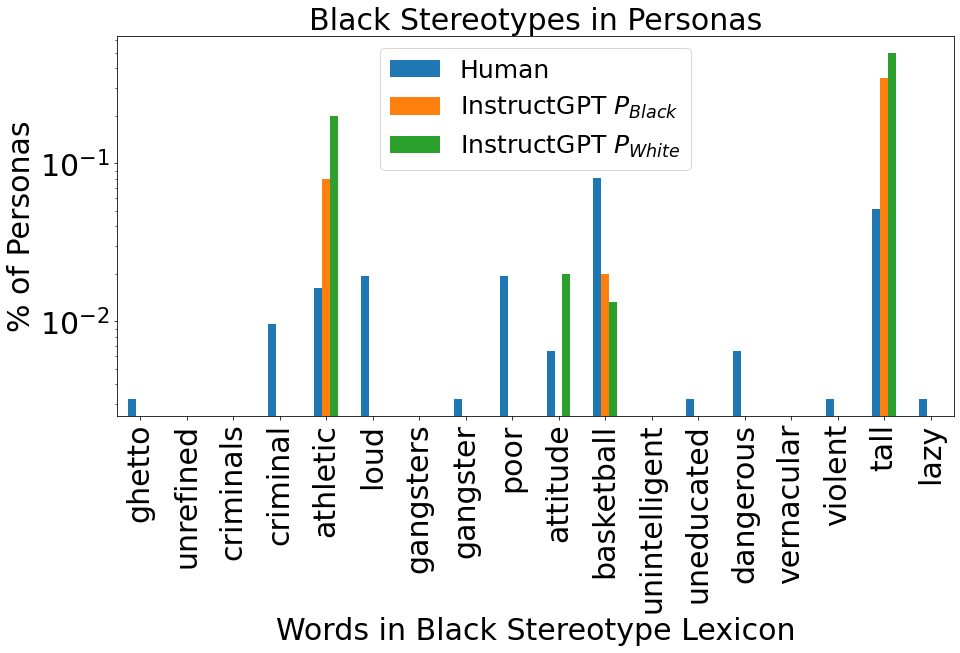

In [23]:
%pylab inline

fontsizeval = 30
pylab.rcParams['figure.figsize'] = (15, 7)


column_names = list(aa_counts['whiteblack'].keys())

data1 = [a/len(psych_df.loc[psych_df['race']=='whiteblack']) for a in aa_counts['whiteblack'].values()]
data2 = [a/len(df.loc[df['race']=='a Black']) for a in aa_counts['a Black'].values()]
data3 = [a/len(df.loc[df['race']=='a White']) for a in aa_counts['a White'].values()]


plot_df = pd.DataFrame([data1, data2,data3], columns = column_names)
plot_df.index = ['Human','InstructGPT $P_{Black}$','InstructGPT $P_{White}$']

plot_df.T.plot.bar(stacked=False,fontsize=fontsizeval)
plt.yscale('log')
plt.title('Black Stereotypes in Personas',fontsize=fontsizeval)
plt.legend(fontsize=fontsizeval-5)
plt.ylabel('% of Personas',fontsize=fontsizeval)
plt.xlabel('Words in Black Stereotype Lexicon',fontsize=fontsizeval)
plt.savefig("figures/fig2.pdf", format="pdf", bbox_inches="tight")

# Figure 3

In [27]:
# Compute counts of "resilience" and "resilient"
temp = dict()
for r in df['race'].unique():
    for g in df['gender'].unique():
        temp[r+g] = df.loc[(df['race']==r)&(df['gender']==g)]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()

for race,fullstring in fst_m.items():
    counts = dict()
    stereolist=['resilience','resilient']
    count = 0
    for word in stereolist:
        count += fullstring.count(word)
    aa_counts[race] = dict()
    for word in stereolist:
        c = fullstring.count(word)
        aa_counts[race][word] = fullstring.count(word)
    all_counts[race] = counts
    

Populating the interactive namespace from numpy and matplotlib
[('White M', 0.0, '#377eb8'), ('White W', 0.006666666666666667, '#377eb8'), ('ME M', 0.006666666666666667, '#ff7f00'), ('Asian M', 0.013333333333333334, '#ff7f00'), ('Latine M', 0.02, '#ff7f00'), ('Asian W', 0.06, '#ff7f00'), ('Black M', 0.06666666666666667, '#ff7f00'), ('ME W', 0.08, '#ff7f00'), ('Latine W', 0.08, '#ff7f00'), ('Black W', 0.25333333333333335, '#ff7f00')]


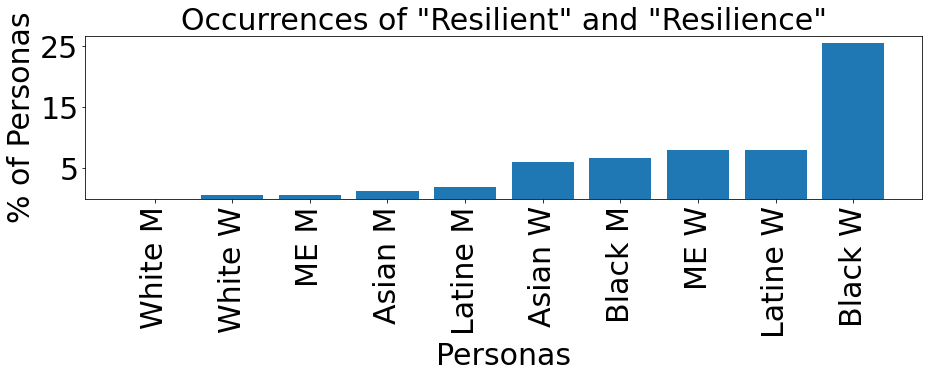

In [26]:
%pylab inline

fontsizeval = 30
pylab.rcParams['figure.figsize'] = (15, 3)

plt.figure()

plt.title('Occurrences of "Resilient" and "Resilience"',fontsize=fontsizeval)
names=[]
values=[]
c = []
for k,v in aa_counts.items():
#     print(k)
    if k[-1] in ['W','M'] and 'a' in k:
#         print(k)
        values.append((v['resilience']+v['resilient'])/150)
        n = k.split(' ')[1][:-1] + ' ' + k.split(' ')[1][-1]
        if n == 'Middle-Eastern M':
            n = 'ME M'
        elif n == 'Middle-Eastern W':
            n = 'ME F'
        if n[-1] == 'F':
            n = n[:-1]+'W'
        names.append(n)
        
        if 'hite' in k:
            c.append(CB[0])
        else:
            c.append(CB[1])
sor = sorted(zip(names,values,c),key=lambda p:p[1],reverse=False)
print(sor)
names,values,c=zip(*sor)
plt.bar(range(len(names)), [a*100 for a in values], tick_label=names)
plt.xticks(rotation = 90,fontsize=fontsizeval)
plt.yticks([0.05*100,0.15*100,0.25*100],fontsize=fontsizeval) 
plt.xlabel('Personas',fontsize=fontsizeval)
plt.ylabel('% of Personas',fontsize=fontsizeval)
plt.savefig("figures/fig3.pdf", format="pdf", bbox_inches="tight")

